# **Introduction:**

**1. Purpose of the Notebook:** <li>This notebook elaborates about wavelet transform and how overcomes the problems faced in Fourier Transform

**2. Learning Outcomes:** <li>Wavelet Transform role in daily life such as ECG, EEG, etc.

**3. Prerequisites:** <li>Wavelet and Fourier Transform

# **Setup:**

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import scipy as sp
from scipy.io import wavfile
import scipy.signal as signal
import cv2
import pywt # PyWavelet: For wavelet transformation
import skimage
from skimage.restoration import denoise_wavelet , estimate_sigma
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import skimage.io

# **Conceptual Overview:**

In [114]:
# All families of Wavelets in PyWavelets
print("Wave Families")
pywt.families(short=False)

Wave Families


['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

## **Wave Family Members**

In [115]:
print("Dicrete Wavelets")
pywt.wavelist(family=None, kind="discrete")

Dicrete Wavelets


['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

In [ ]:
print("Continuous Wavelets")
pywt.wavelist(family=None, kind="continuous")

## **Modes**

In [127]:
print("Modes:")
pywt.Modes.modes

Modes:


['zero',
 'constant',
 'symmetric',
 'periodic',
 'smooth',
 'periodization',
 'reflect',
 'antisymmetric',
 'antireflect']

# **Code Sample:**

## **Audio Processing**

### **Dicrete Wave Transform**

#### **Single Level Decomposition**

In [ ]:
samplerate, song = wavfile.read("AudioSample.wav")

# Mono Audio Left
data = song[:,0]/max(song[:,0])

# Run play time
t = len(data)/float(samplerate)
time = np.arange(len(data))/float(samplerate)
print("Time in s: ",t)

# Co-efficient of Approximation -   cA : Captures Low frequency data
# Detaild Co-efficient          -   cD : Captures High frequency data
cA, cD = pywt.dwt(data, "bior6.8", "periodic")

# song out of decmposed cA and cD
y = pywt.idwt(cA, cD, "bior6.8", "periodic")
y = y[0:len(data)]

wavfile.write('AudioSample2.wav', samplerate, y)
wavfile.write('AudioSamplecD.wav', samplerate, cD)

# Plot
plt.rcParams["figure.figsize"] = (18, 24)

plt.subplots(4,1)

plt.subplot(411)
plt.plot(time, data, 'black')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Song")

plt.subplot(412)
plt.plot(cA)
plt.xlabel("Samples")
plt.ylabel("Co-efficient of Approximation (cA)")
plt.title("Co-efficient of Approximation")

plt.subplot(413)
plt.plot(cD, 'g')
plt.xlabel("Samples")
plt.ylabel("Detailed Co-efficient(cD)")
plt.title("Detailed Co-efficient")

plt.subplot(414)
plt.plot(time, y, 'r')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Reconstructed Song")

plt.savefig("Wavelet-Analysis.png")
plt.show()

#### **Multi Level Decomposition**

In [ ]:
samplerate, song = wavfile.read("AudioSample.wav")

# Mono Audio Left
data = song[:,0]/max(song[:,0])

# Run play time
t = len(data)/float(samplerate)
time = np.arange(len(data))/float(samplerate)
print("Time in s: ",t)

# Co-efficient of Approximation -   cA : Captures Low frequency data
# Detaild Co-efficient          -   cD : Captures High frequency data
coeffs = pywt.wavedec(data, "bior6.8", "periodic", level =2)
cA2, cD2, cD1 = coeffs

# song out of decmposed cA and cD
y = pywt.waverec(coeffs, "bior6.8", "periodic")
y = y[0:len(data)]

wavfile.write('AudioSample2.wav', samplerate, y)
wavfile.write('AudioSamplecD.wav', samplerate, cD)

# Plot
plt.rcParams["figure.figsize"] = (18, 25)

plt.subplots(5,1)

plt.subplot(511)
plt.plot(time, data, 'black')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Song")

plt.subplot(512)
plt.plot(cA2)
plt.xlabel("Samples")
plt.ylabel("Co-efficient of Approximation (cA2)")
plt.title("Co-efficient of Approximation - 2")

plt.subplot(513)
plt.plot(cD2, 'g')
plt.xlabel("Samples")
plt.ylabel("Detailed Co-efficient(cD2)")
plt.title("Detailed Co-efficient - 2")

plt.subplot(514)
plt.plot(cD1, 'g')
plt.xlabel("Samples")
plt.ylabel("Detailed Co-efficient(cD1)")
plt.title("Detailed Co-efficient - 1")

plt.subplot(515)
plt.plot(time, y, 'r')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Reconstructed Song")

# plt.savefig("Wavelet-Analysis.png")
plt.show()

#### **Denoising Audio Signal**

In [ ]:
samplerate, song = wavfile.read("AudioSample.wav")

# Mono Audio Left Normalized
data = song[:,0]/max(song[:,0])

# Run play time
t = len(data)/float(samplerate)
time = np.arange(len(data))/float(samplerate)
print("Time in s: ",t)

# Generation of Noisy Audio Signal
sigma = 0.1 # Noise Variance
data_noisy = data + sigma * np.random.randn(data.size)

# Methods= VisuShrink/BayesShrink, Modes= soft/hard
data_denoise = skimage.restoration.denoise_wavelet(data_noisy, method="VisuShrink", mode="soft", wavelet_levels=3, wavelet="sym6", rescale_sigma=True)

plt.rcParams["figure.figsize"] = (15, 10)
plt.subplots(2,1)

plt.subplot(211)
plt.plot(data_noisy, "r")
plt.title("Noisy Audio")

plt.subplot(212)
plt.plot(data_denoise)
plt.title("Denoised Audio")

### **Continuous Wave Transform**

In [ ]:
samplerate, song = wavfile.read("AudioSample.wav")

# Mono Audio Left
song = song[:,0]

t = len(song)/samplerate

samples = np.arange(0,len(song))
scales = np.arange(1,201)

coeff, freq = pywt.cwt(song, scales, "morl")

# Plotting Scalogram
plt.rcParams["figure.figsize"] = (15, 10)
plt.imshow(abs(coeff), extent=[0, len(song), 200, 1], interpolation = 'bilinear', cmap = 'copper', aspect = 'auto', vmax = abs(coeff).max(), vmin = -abs(coeff).max())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,201,20))
plt.xticks(np.arange(1,len(song),50000))
plt.show()

# Plotting Audio Signal
plt.rcParams["figure.figsize"] = (15, 4)
plt.plot(samples,song)

## **Image Processing**

### **Single Level Decomposition**

In [ ]:
# Reading the image
img = cv2.imread("EiffelTower.jpg", cv2.IMREAD_GRAYSCALE)

# Performing dicrete wavelet transform on image
coeff2 = pywt.dwt2(img, 'sym2', mode = 'periodization')

# Obtaining Approximation, Horizontal detailed, Vertical detailed and Diagonal Detailed Matrices
cA, (cH, cV, cD) = coeff2

# Recontructing image
imgr = pywt.idwt2(coeff2, 'sym2', "periodization")
imgr = np.uint8(imgr)

# Plot
plt.rcParams["figure.figsize"] = (12, 8)

plt.imshow(img, cmap="gray")
plt.title("Original Image", fontsize = 20)
plt.axis("off")
plt.show()

plt.subplots(2,2)

plt.subplot(221)
plt.imshow(cA, cmap="gray")
plt.title("cA: Approximation Coefficient", fontsize = 20)
plt.axis("off")


plt.subplot(222)
plt.imshow(cH, cmap="gray")
plt.title("cH: Horizontal Detailed Coefficient", fontsize = 20)
plt.axis("off")


plt.subplot(223)
plt.imshow(cV, cmap="gray")
plt.title("cV: Vertical Detailed Coefficient", fontsize = 20)
plt.axis("off")


plt.subplot(224)
plt.imshow(cD, cmap="gray")
plt.title("cD: Diagonal Detailed Coefficient", fontsize = 20)
plt.axis("off")

plt.show()

plt.imshow(imgr, cmap="gray")
plt.title("Reconstructed Image", fontsize = 20)
plt.axis("off")

plt.show()

### **Multi Level Decomposition**

In [ ]:
# Reading the image
img = cv2.imread("EiffelTower.jpg", cv2.IMREAD_GRAYSCALE)

# Performing dicrete wavelet transform on image
coeff2 = pywt.wavedec2(img, 'sym2', mode = 'periodization', level = 2)

# Obtaining Approximation, Horizontal detailed, Vertical detailed and Diagonal Detailed Matrices: [cAn, (cHn,cVn,cDn),....,(cH1,cV1,cD1)]
[cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)] = coeff2

# Recontructing image
imgr = pywt.waverec2(coeff2, 'sym2', "periodization")
imgr = np.uint8(imgr)

# Plot
plt.rcParams["figure.figsize"] = (12, 8)

plt.imshow(img, cmap="gray")
plt.title("Original Image", fontsize = 20)
plt.axis("off")
plt.show()

plt.subplots(2,2)

plt.subplot(221)
plt.imshow(cA2, cmap="gray")
plt.title("cA2: Approximation Coefficient", fontsize = 20)
plt.axis("off")

plt.subplot(222)
plt.imshow(cH2, cmap="gray")
plt.title("cH2: Horizontal Detailed Coefficient", fontsize = 20)
plt.axis("off")

plt.subplot(223)
plt.imshow(cV2, cmap="gray")
plt.title("cV2: Vertical Detailed Coefficient", fontsize = 20)
plt.axis("off")

plt.subplot(224)
plt.imshow(cD2, cmap="gray")
plt.title("cD2: Diagonal Detailed Coefficient", fontsize = 20)
plt.axis("off")

plt.show()

plt.rcParams["figure.figsize"] = (30, 15)

plt.subplots(3,1)

plt.subplot(311)
plt.imshow(cH1, cmap="gray")
plt.title("cH1: Horizontal Detailed Coefficient", fontsize = 20)
plt.axis("off")

plt.subplot(312)
plt.imshow(cV1, cmap="gray")
plt.title("cV1: Vertical Detailed Coefficient", fontsize = 20)
plt.axis("off")

plt.subplot(313)
plt.imshow(cD1, cmap="gray")
plt.title("cD1: Diagonal Detailed Coefficient", fontsize = 20)
plt.axis("off")

plt.show()

plt.rcParams["figure.figsize"] = (12, 8)

plt.imshow(imgr, cmap="gray")
plt.title("Reconstructed Image", fontsize = 20)
plt.axis("off")

plt.show()

### **Denoising Image using OpenCV**

In [ ]:
img = cv2.imread("EiffelTower.jpg")
imgr = np.zeros_like(img)

# Default values: 
# Saerch window:            21 ## Increases linearly with increase
# Template window size:     7 ## Preferred odd numbers
# Luminance h:              3 ## 10 is max to remove all noise
# Luminance Colour hColor:  3
cv2.fastNlMeansDenoisingColored(img, imgr)

cv2.imshow("Original image", img)
cv2.imshow("Denoised image", imgr)
cv2.waitKey(0)

### **Denoising Image using BayesShrink and VisuShrink**

In [ ]:
img = skimage.io.imread("EiffelTower.jpg", as_gray=True)

sigma = 0.1 # Noise Standard Deviation

# Noisy image generation
img_noisy = random_noise(img, var = sigma**2)

est_sigma = estimate_sigma(img_noisy, average_sigmas=True)

# Denoising
img_bayes = denoise_wavelet(img_noisy, method = "BayesShrink", mode = "soft", wavelet_levels = 3, wavelet = "sym20", rescale_sigma=True)

img_visu = denoise_wavelet(img_noisy, method = "VisuShrink", mode = "soft", wavelet_levels= 3, wavelet = "sym20", rescale_sigma=True, sigma = est_sigma/5)

plt.subplots(2,2)

plt.subplot(221)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(222)
plt.imshow(img_noisy, cmap="gray")
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(223)
plt.imshow(img_bayes, cmap="gray")
plt.title("BayesShrink Smoothened Image")
plt.axis("off")

plt.subplot(224)
plt.imshow(img_visu, cmap="gray")
plt.title("VisuShrink Smoothened Image")
plt.axis("off")

### **Image Compression**

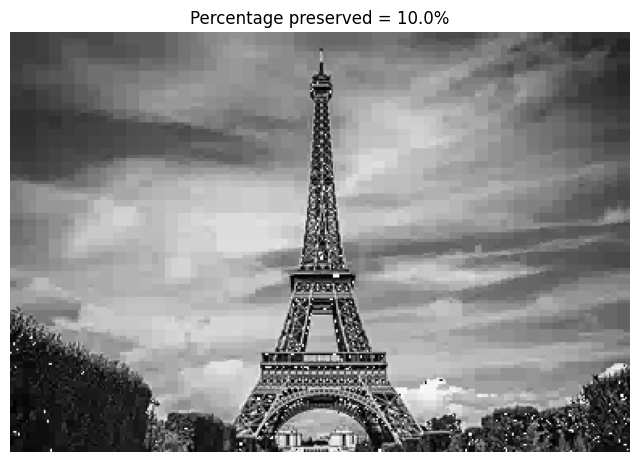

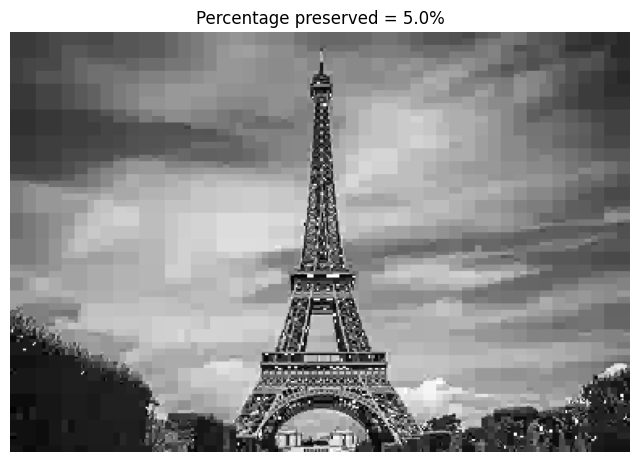

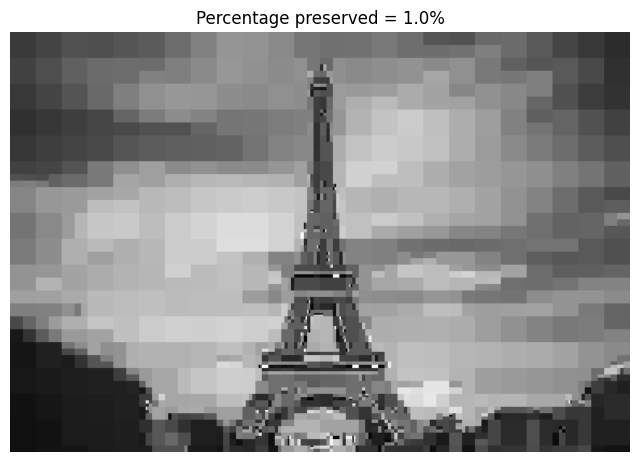

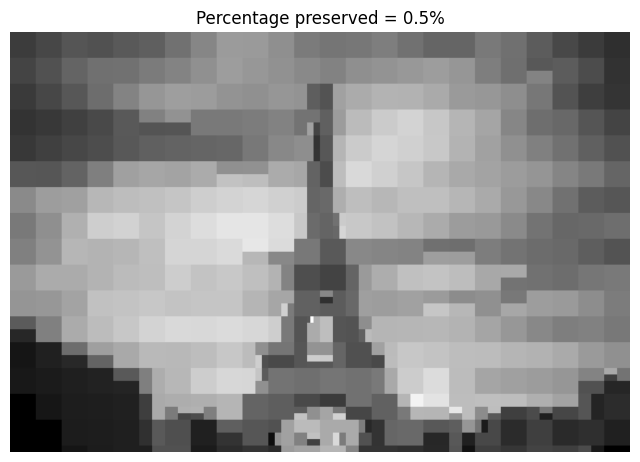

In [126]:
# Reading the image
img = cv2.imread("EiffelTower.jpg", cv2.IMREAD_GRAYSCALE)

# Performing dicrete wavelet transform on image
coeff4 = pywt.wavedec2(img, 'haar', mode = 'periodization', level = 4)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeff4)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices = coeff_slices,output_format= "wavedec2")

    # Plot Reconstruction
    imgr = pywt.waverec2(coeffs_filt, 'haar')
    plt.figure()
    plt.imshow(imgr.astype("uint8"), cmap = "gray")
    plt.axis("off")
    plt.rcParams['figure.figsize'] = [8,8]
    plt.title("Percentage preserved = "+str(keep*100)+"%")

# **References**

<li>https://rawpedia.rawtherapee.com/Wavelet_Levels#:~:text=The%20Wavelet%20Levels%20tool%20is,as%20interpolation%20or%20color%20management
<li>https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html 
<li>https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_wavelet
<li>https://www.youtube.com/playlist?list=PLvRBvEOISo-mdDB9EkwJfW04v9TJoPZwv
<li>https://www.youtube.com/playlist?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC